## Imports

In [ ]:
pip install wordcloud adjustText 
# pip install pyvis

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string

from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from adjustText import adjust_text

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib
import plotly.figure_factory as ff
import numpy as np
import hashlib
import csv
import pickle

from sklearn.metrics.pairwise import cosine_similarity
from datasketch import MinHash, MinHashLSH

import re
from nltk.tokenize import word_tokenize
import os
from gensim.models import Word2Vec
import networkx as nx
from pyvis.network import Network
from scipy.spatial.distance import cosine
import plotly.express as px
import webbrowser

## Data Analysis

  lan_code                sentence
0      cmn                  我們試試看！
1      cmn                 我该去睡觉了。
2      cmn                 你在干什麼啊？
3      cmn                  這是什麼啊？
4      cmn  今天是６月１８号，也是Muiriel的生日！
    lan_code  frequency
0        eng    1586621
1        rus     909951
2        ita     805104
3        tur     717897
4        epo     685643
..       ...        ...
399      ssw          1
400      urh          1
401      lou          1
402      rel          1
403      hax          1

[404 rows x 2 columns]


C:\Users\saver\AppData\Local\Temp\ipykernel_15748\2213813112.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')


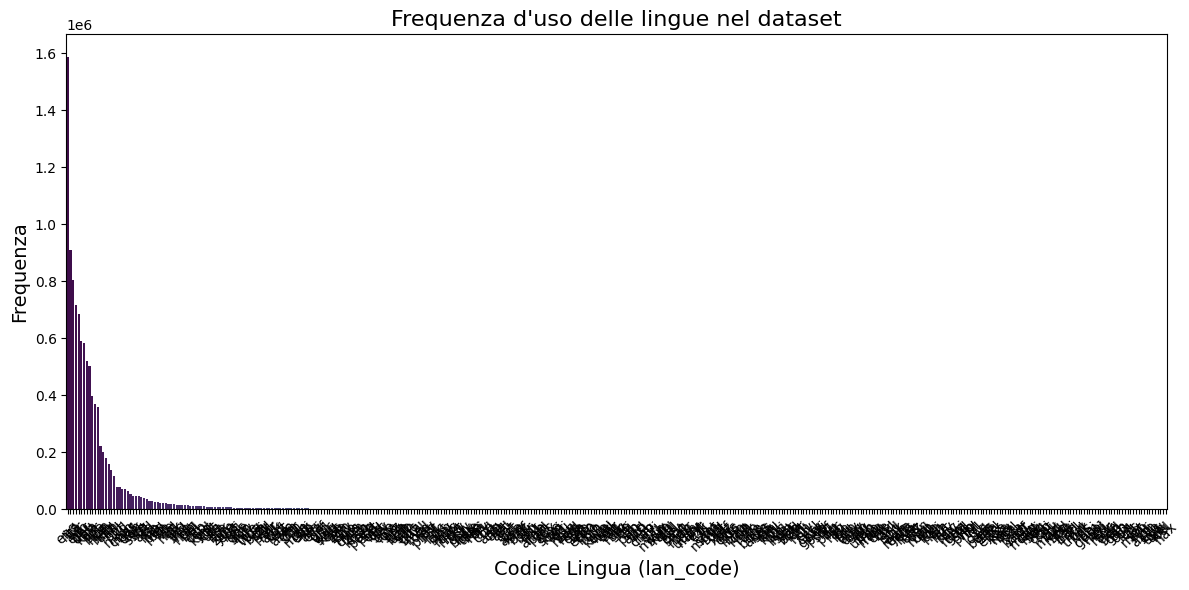

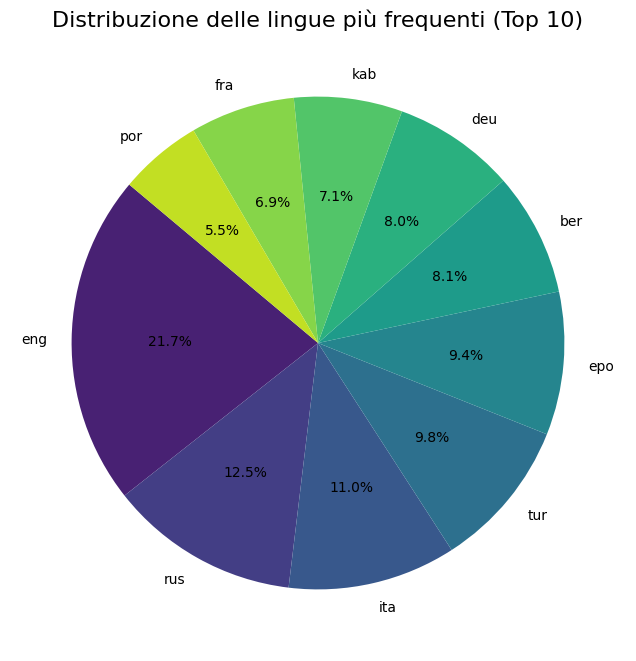

In [2]:
# Caricare il dataset
file_path = 'data/sentences.csv'  # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Controllare i primi dati del dataset
print(data.head())

# Calcolare la frequenza di utilizzo delle lingue
language_counts = data['lan_code'].value_counts()

# Creare un dataframe per una migliore visualizzazione
language_df = language_counts.reset_index()
language_df.columns = ['lan_code', 'frequency']

# Stampare le statistiche principali
print(language_df)

# Visualizzare il grafico a barre della frequenza delle lingue
plt.figure(figsize=(12, 6))
sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')
plt.xticks(rotation=45)
plt.title('Frequenza d\'uso delle lingue nel dataset', fontsize=16)
plt.xlabel('Codice Lingua (lan_code)', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.tight_layout()
plt.show()

# (Opzionale) Visualizzare un grafico a torta per le lingue più usate
top_languages = language_df.head(10)  # Primi 10 codici lingua più frequenti
plt.figure(figsize=(8, 8))
plt.pie(top_languages['frequency'], labels=top_languages['lan_code'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_languages)))
plt.title('Distribuzione delle lingue più frequenti (Top 10)', fontsize=16)
plt.show()

Nuovo file CSV salvato in: data/filtered_language_detection.csv
Dimensione del nuovo dataset: 10041510 righe (su 10341812 totali).
  lan_code                sentence
0      cmn                  我們試試看！
1      cmn                 我该去睡觉了。
2      cmn                 你在干什麼啊？
3      cmn                  這是什麼啊？
4      cmn  今天是６月１８号，也是Muiriel的生日！
   lan_code  frequency
0       eng    1586621
1       rus     909951
2       ita     805104
3       tur     717897
4       epo     685643
5       ber     591222
6       deu     584674
7       kab     518328
8       fra     501241
9       por     398029
10      spa     369841
11      hun     357828
12      jpn     220103
13      heb     199203
14      ukr     178269
15      nld     159193
16      fin     139089
17      pol     116582
18      mkd      77949
19      lit      76149
20      cmn      72439
21      mar      69303
22      ces      63880
23      dan      54945
24      tok      47203
25      swe      47006
26      srp      45199
27      lat    

C:\Users\saver\AppData\Local\Temp\ipykernel_15748\1323358416.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')


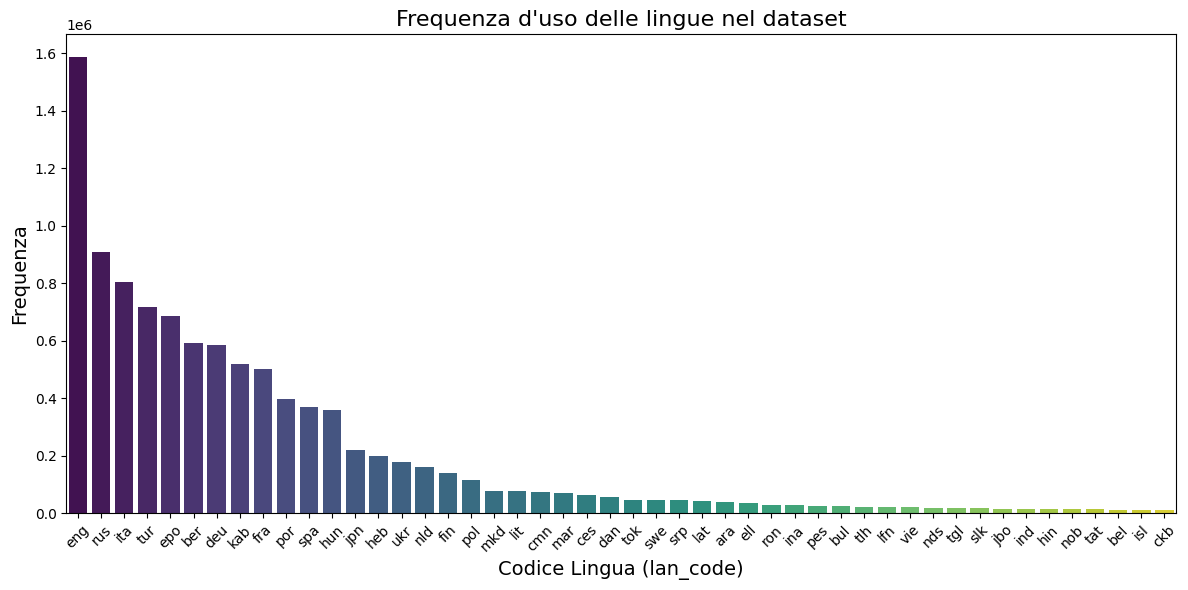

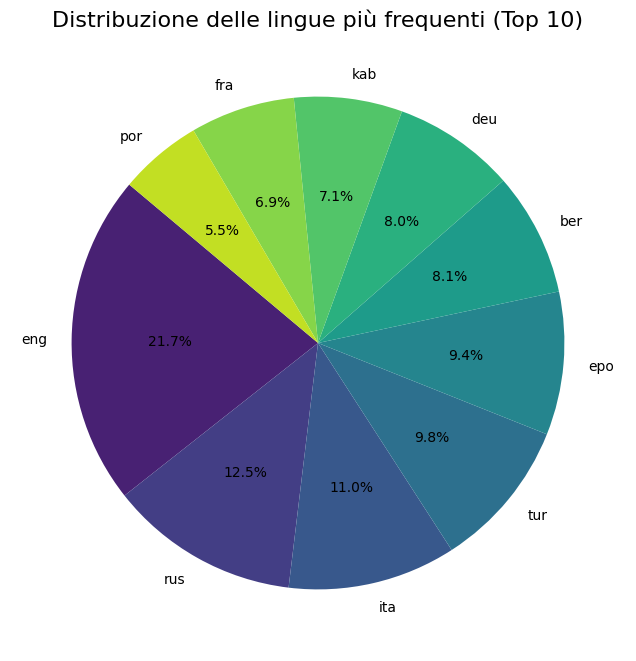

In [3]:
# Calcolare il totale delle righe
total_rows = len(data)

# Calcolare la frequenza delle lingue
language_counts = data['lan_code'].value_counts()

# Filtrare i codici lingua con frequenza >= 0.01% del totale
threshold = 0.001 * total_rows  # 0.01% del totale
valid_languages = language_counts[language_counts >= threshold].index

# Filtrare il dataset mantenendo solo le righe con i codici lingua validi
filtered_data = data[data['lan_code'].isin(valid_languages)]

# Salvare il nuovo dataset in un file CSV
output_path = 'data/filtered_language_detection.csv'  # Sostituisci con il nome desiderato per il file
filtered_data.to_csv(output_path, index=False)

print(f"Nuovo file CSV salvato in: {output_path}")
print(f"Dimensione del nuovo dataset: {len(filtered_data)} righe (su {total_rows} totali).")

file_path = 'data/filtered_language_detection.csv'  # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Controllare i primi dati del dataset
print(data.head())

# Calcolare la frequenza di utilizzo delle lingue
language_counts = data['lan_code'].value_counts()

# Creare un dataframe per una migliore visualizzazione
language_df = language_counts.reset_index()
language_df.columns = ['lan_code', 'frequency']

# Stampare le statistiche principali
print(language_df)

# Visualizzare il grafico a barre della frequenza delle lingue
plt.figure(figsize=(12, 6))
sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')
plt.xticks(rotation=45)
plt.title('Frequenza d\'uso delle lingue nel dataset', fontsize=16)
plt.xlabel('Codice Lingua (lan_code)', fontsize=14)
plt.ylabel('Frequenza', fontsize=14)
plt.tight_layout()
plt.show()

# (Opzionale) Visualizzare un grafico a torta per le lingue più usate
top_languages = language_df.head(10)  # Primi 10 codici lingua più frequenti
plt.figure(figsize=(8, 8))
plt.pie(top_languages['frequency'], labels=top_languages['lan_code'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_languages)))
plt.title('Distribuzione delle lingue più frequenti (Top 10)', fontsize=16)
plt.show()

In [4]:
# Funzione per estrarre termini unici da una frase
def get_unique_terms(sentence):
    # Tokenizzazione semplice basata sugli spazi, rimozione di punteggiatura e conversione a minuscolo
    if isinstance(sentence, str):
        words = sentence.lower().split()
        return set(words)
    return set()

# Creare un dizionario per conteggiare i termini unici per lingua
unique_terms_per_language = {}

# Iterare per ogni lingua e accumulare termini unici
for lan_code, group in data.groupby('lan_code'):
    all_terms = set()
    for sentence in group['sentence']:
        all_terms.update(get_unique_terms(sentence))
    unique_terms_per_language[lan_code] = len(all_terms)

# Creare un DataFrame per visualizzare i risultati
unique_terms_df = pd.DataFrame(list(unique_terms_per_language.items()), columns=['lan_code', 'unique_terms'])

# Ordinare il DataFrame per numero di termini unici in ordine decrescente
unique_terms_df = unique_terms_df.sort_values(by='unique_terms', ascending=False)

# Stampare le statistiche principali
print(unique_terms_df)

# Salvare i risultati in un file CSV
output_path = 'data/unique_terms_per_language.csv'
unique_terms_df.to_csv(output_path, index=False)

print(f"Risultati salvati in: {output_path}")

   lan_code  unique_terms
36      rus        255924
11      epo        247182
22      jpn        220719
16      hun        214852
45      tur        211054
23      kab        203891
2       ber        201578
8       deu        197008
10      eng        170993
38      spa        128056
13      fra        125321
34      por        121962
20      ita        121699
12      fin        101601
14      heb         99955
6       cmn         76048
33      pol         75483
46      ukr         71530
30      nld         56689
26      lit         52097
39      srp         46588
24      lat         44511
4       ces         44506
0       ara         44422
28      mkd         41441
7       dan         31889
41      tat         29627
27      mar         27588
40      swe         26363
17      ina         25991
35      ron         23956
1       bel         23463
9       ell         23407
3       bul         21865
32      pes         21423
43      tlh         21217
25      lfn         20317
42      tgl 

  lan_code  unique_terms
0      rus        255924
1      epo        247182
2      jpn        220719
3      hun        214852
4      tur        211054


C:\Users\saver\AppData\Local\Temp\ipykernel_15748\158821832.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_terms_df, x='lan_code', y='unique_terms', palette='viridis')


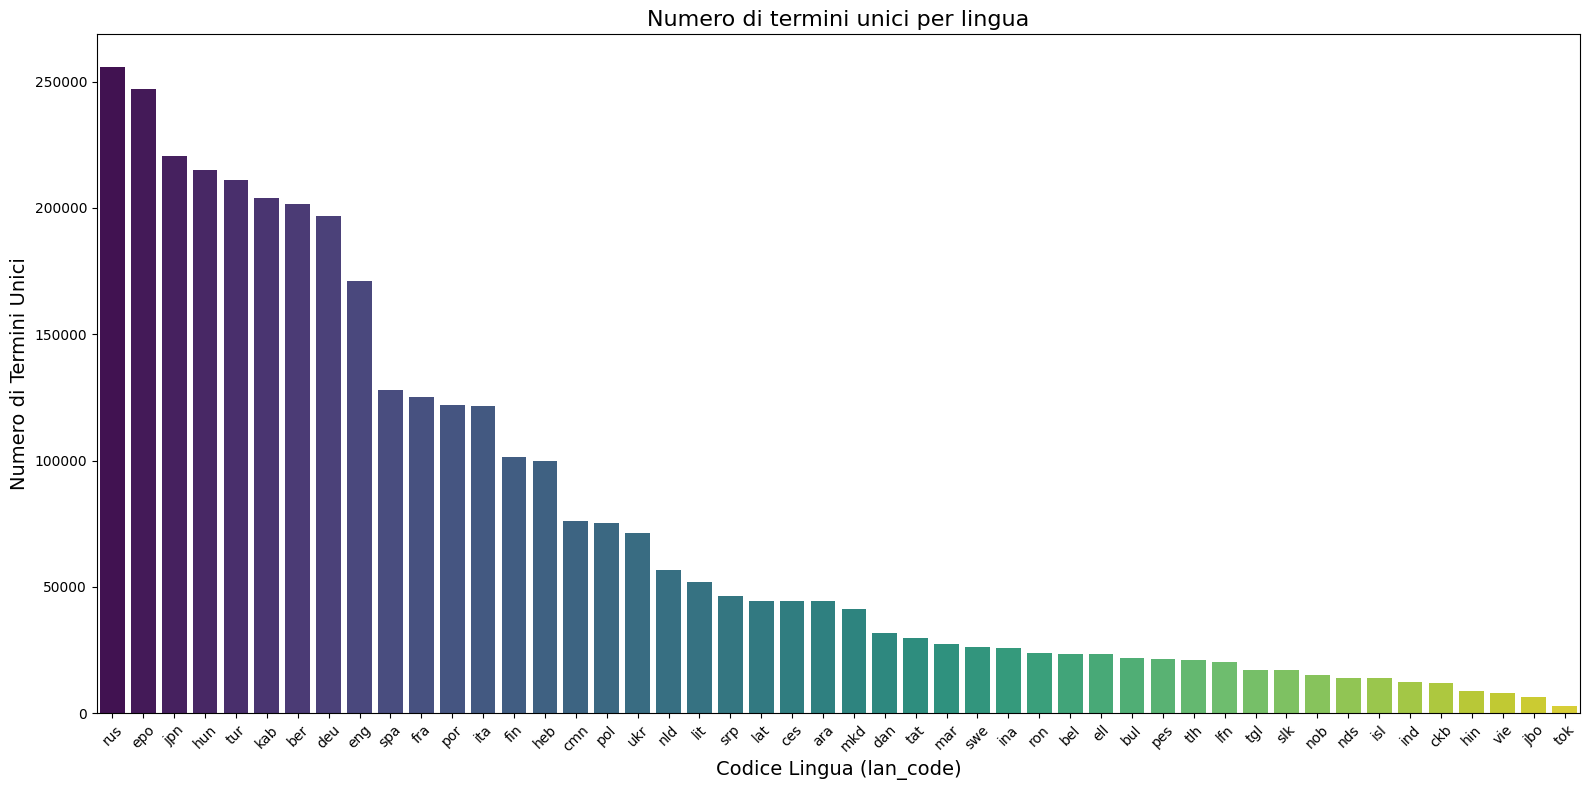

In [5]:
input_path = 'data/unique_terms_per_language.csv'
unique_terms_df = pd.read_csv(input_path)

# Visualizzare i primi risultati
print(unique_terms_df.head())

# Creare il grafico a barre
plt.figure(figsize=(16, 8))
sns.barplot(data=unique_terms_df, x='lan_code', y='unique_terms', palette='viridis')
plt.xticks(rotation=45, fontsize=10)
plt.title('Numero di termini unici per lingua', fontsize=16)
plt.xlabel('Codice Lingua (lan_code)', fontsize=14)
plt.ylabel('Numero di Termini Unici', fontsize=14)
plt.tight_layout()
plt.show()

## TF-IDF

In [2]:
# Caricare il dataset filtrato
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

# Concatenare tutte le frasi per ogni lingua
language_sentences = data.groupby('lan_code')['sentence'].apply(lambda x: ' '.join(x)).reset_index()

# Calcolare il TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000 , lowercase=True)  # Puoi personalizzare max_features
tfidf_matrix = tfidf_vectorizer.fit_transform(language_sentences['sentence'])

# Convertire il risultato in un DataFrame per una migliore visualizzazione
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=language_sentences['lan_code'], columns=tfidf_vectorizer.get_feature_names_out())

# Visualizzare i primi risultati
print(tfidf_df.head())

# Salvare il TF-IDF in un file CSV
output_path = 'data/tfidf_language_analysis.csv'
tfidf_df.to_csv(output_path)

print(f"TF-IDF salvato in: {output_path}")

                00       000        10       100        11        12  \
lan_code                                                               
ara       0.000000  0.000325  0.000171  0.000190  0.000061  0.000081   
bel       0.000544  0.000360  0.000650  0.000480  0.000272  0.000360   
ber       0.000596  0.000085  0.000279  0.000149  0.000047  0.000096   
bul       0.000347  0.000420  0.000276  0.000306  0.000043  0.000038   
ces       0.000032  0.000142  0.000230  0.000255  0.000000  0.000028   

                13        14        15        16  ...     ṛebbi     ṛuḥen  \
lan_code                                          ...                       
ara       0.000057  0.000115  0.000057  0.000029  ...  0.000000  0.000000   
bel       0.000250  0.000128  0.000250  0.000130  ...  0.000000  0.000000   
ber       0.000076  0.000038  0.000071  0.000032  ...  0.005564  0.007426   
bul       0.000040  0.000122  0.000120  0.000000  ...  0.000000  0.000000   
ces       0.000059  0.000030  0.0

In [3]:
nltk.download('stopwords')

# Caricare il dataset filtrato
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

# Funzione per rimuovere stop words e punteggiatura
def remove_stopwords(sentence, language):
    try:
        stop_words = set(stopwords.words(language))  # Ottieni stop words per la lingua specifica
    except:
        stop_words = set()  # Se la lingua non è supportata, nessuna stop word viene usata
    # Tokenizzazione semplice e rimozione di stop words e punteggiatura
    tokens = sentence.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return ' '.join([word for word in tokens if word not in stop_words])

# Aggiungere un mapping tra codici lingua e le lingue supportate da NLTK
language_mapping = {
    'eng': 'english',
    'ita': 'italian',
    'fra': 'french',
    'spa': 'spanish',
    'deu': 'german',
    'ara': 'arabic',
    'aze': 'azerbaijani',
    'tur': 'turkish',
    'dan': 'danish',
    'fin': 'finnish',
    'ell': 'greek',
    'hun': 'hungarian',
    'ind': 'indonesian',
    'kaz': 'kazakh',
    'npi': 'nepali',
    'nob': 'norwegian',
    'rom': 'romanian',
    'por': 'portuguese',
    'rus': 'russian',
    'slv': 'slovene',
    'swe': 'swedish',
    'tgk': 'tajik'
}

# Applicare la rimozione delle stop words per ogni frase
data['cleaned_sentence'] = data.apply(
    lambda row: remove_stopwords(row['sentence'], language_mapping.get(row['lan_code'], '')),
    axis=1
)

# Concatenare tutte le frasi per ogni lingua
language_sentences = data.groupby('lan_code')['cleaned_sentence'].apply(lambda x: ' '.join(x)).reset_index()

# Calcolare il TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True)  # Personalizza max_features se necessario
tfidf_matrix = tfidf_vectorizer.fit_transform(language_sentences['cleaned_sentence'])

# Convertire il risultato in un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=language_sentences['lan_code'], columns=tfidf_vectorizer.get_feature_names_out())

# Salvare i risultati in un file CSV
output_path = 'data/tfidf_language_analysis_with_stopwords_removal.csv'
tfidf_df.to_csv(output_path)

print(f"TF-IDF con rimozione stop words salvato in: {output_path}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saver\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF con rimozione stop words salvato in: data/tfidf_language_analysis_with_stopwords_removal.csv


In [4]:
# Carica i DataFrame TF-IDF dal file CSV, assicurandoti che l'indice sia impostato correttamente
file_path = 'data/tfidf_language_analysis.csv'
tfidf_df = pd.read_csv(file_path, index_col=0)

file_path = 'data/tfidf_language_analysis_with_stopwords_removal.csv'
filtered_tfidf_df = pd.read_csv(file_path, index_col=0)


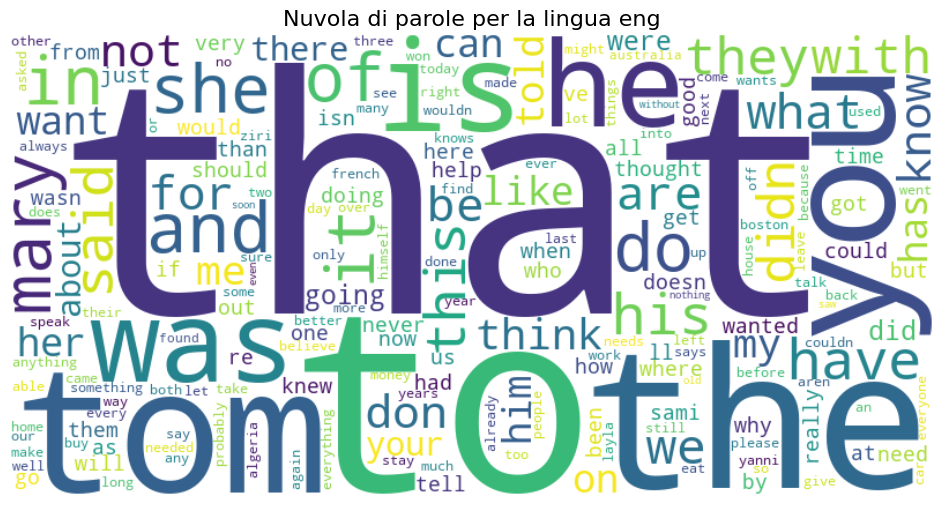

In [5]:
language_to_plot = 'eng'  # Usa il codice della lingua (es. 'eng', 'ita', ecc.)

if language_to_plot in tfidf_df.index:
    # Ottieni solo le colonne (evitando di includere l'indice)
    word_scores = tfidf_df.loc[language_to_plot].dropna().to_dict()

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wordcloud.generate_from_frequencies(word_scores)

    # Mostrare la nuvola di parole
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuvola di parole per la lingua {language_to_plot}", fontsize=16)
    plt.show()
else:
    print(f"La lingua '{language_to_plot}' non è presente nel DataFrame.")


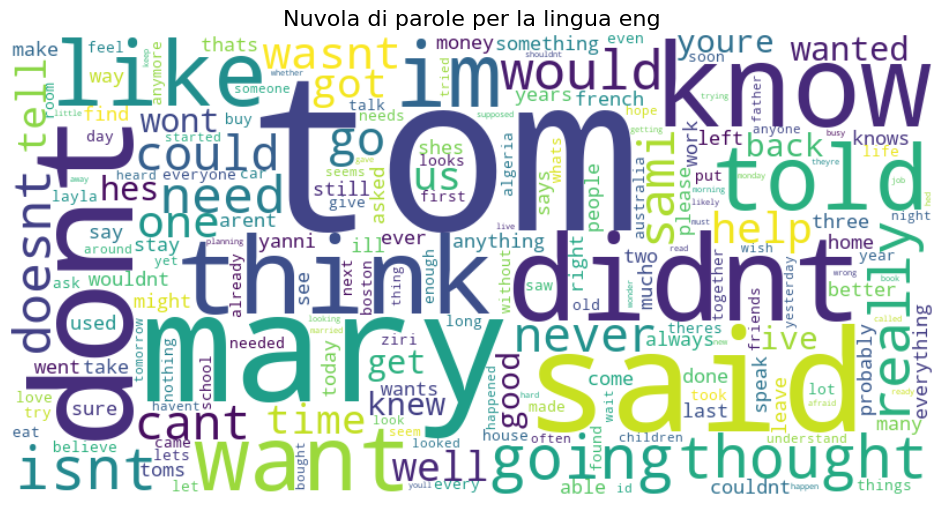

In [6]:
if language_to_plot in filtered_tfidf_df.index:
    # Ottieni solo le colonne (evitando di includere l'indice)
    word_scores = filtered_tfidf_df.loc[language_to_plot].dropna().to_dict()

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wordcloud.generate_from_frequencies(word_scores)

    # Mostrare la nuvola di parole
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Nuvola di parole per la lingua {language_to_plot}", fontsize=16)
    plt.show()
else:
    print(f"La lingua '{language_to_plot}' non è presente nel DataFrame.")

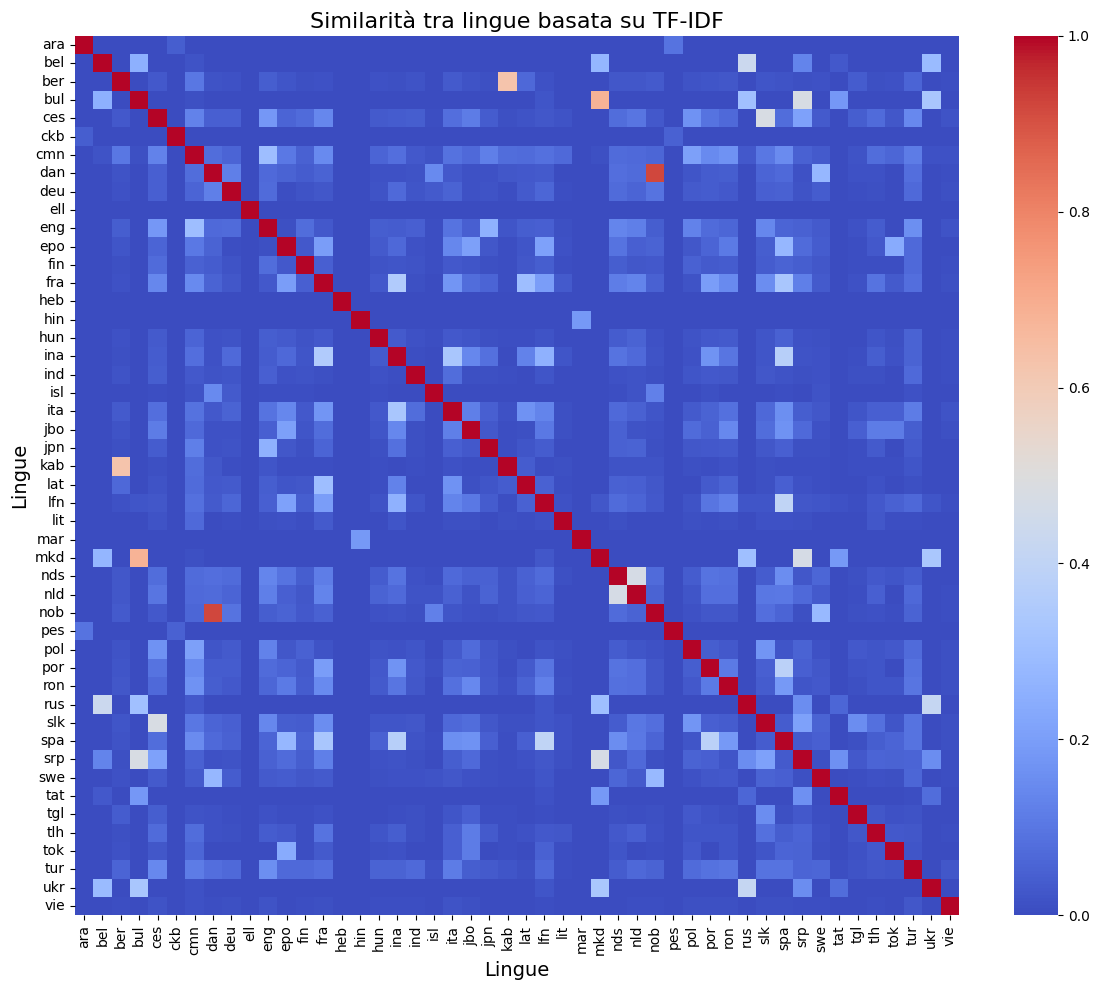

In [7]:
# Calcolare la similarità coseno tra le lingue
similarity_matrix = cosine_similarity(tfidf_df)

# Creare un DataFrame per la heatmap
similarity_df = pd.DataFrame(similarity_matrix, index=tfidf_df.index, columns=tfidf_df.index)

# Visualizzare la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Similarità tra lingue basata su TF-IDF", fontsize=16)
plt.xlabel("Lingue", fontsize=14)
plt.ylabel("Lingue", fontsize=14)
plt.tight_layout()
plt.show()


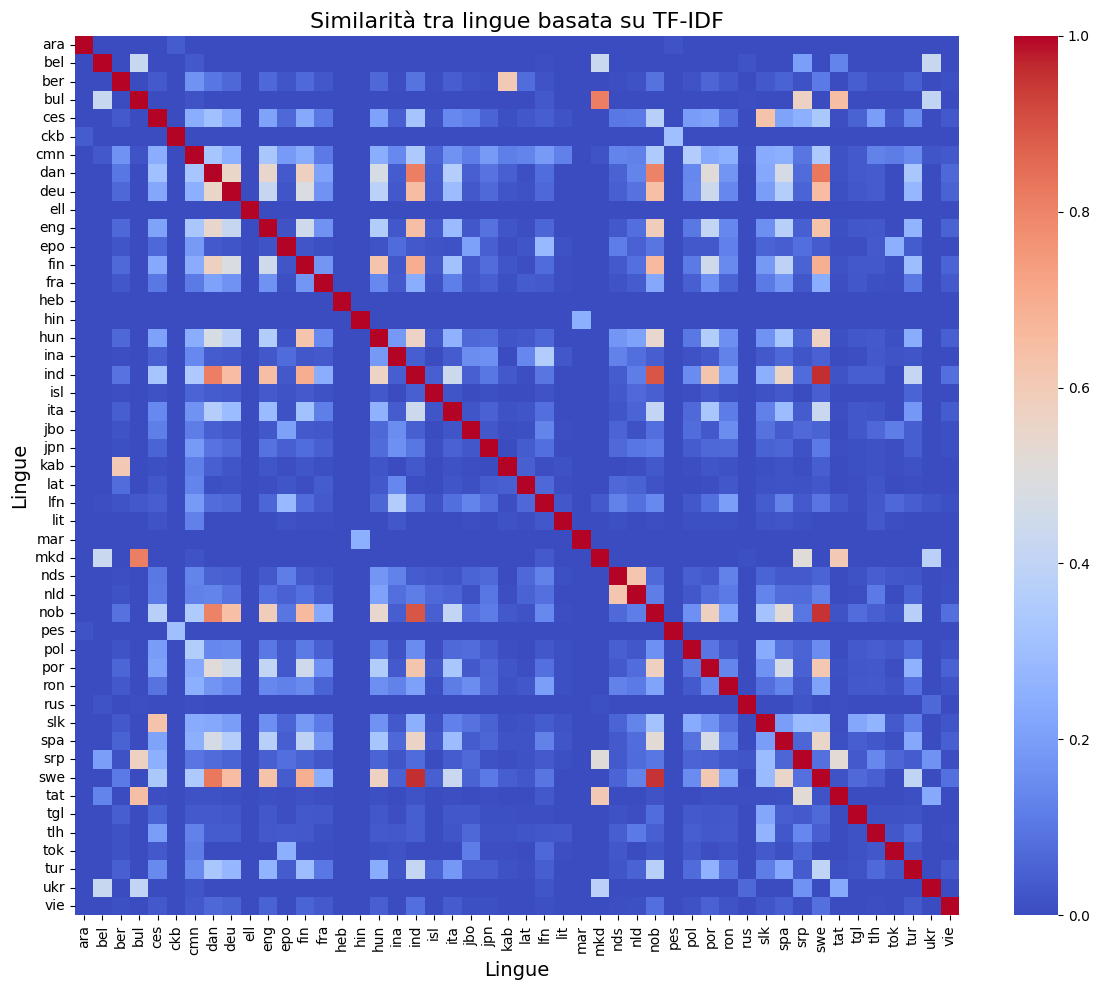

In [8]:
# Calcolare la similarità coseno tra le lingue
similarity_matrix = cosine_similarity(filtered_tfidf_df)

# Creare un DataFrame per la heatmap
similarity_df = pd.DataFrame(similarity_matrix, index=filtered_tfidf_df.index, columns=filtered_tfidf_df.index)

# Visualizzare la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Similarità tra lingue basata su TF-IDF", fontsize=16)
plt.xlabel("Lingue", fontsize=14)
plt.ylabel("Lingue", fontsize=14)
plt.tight_layout()
plt.show()

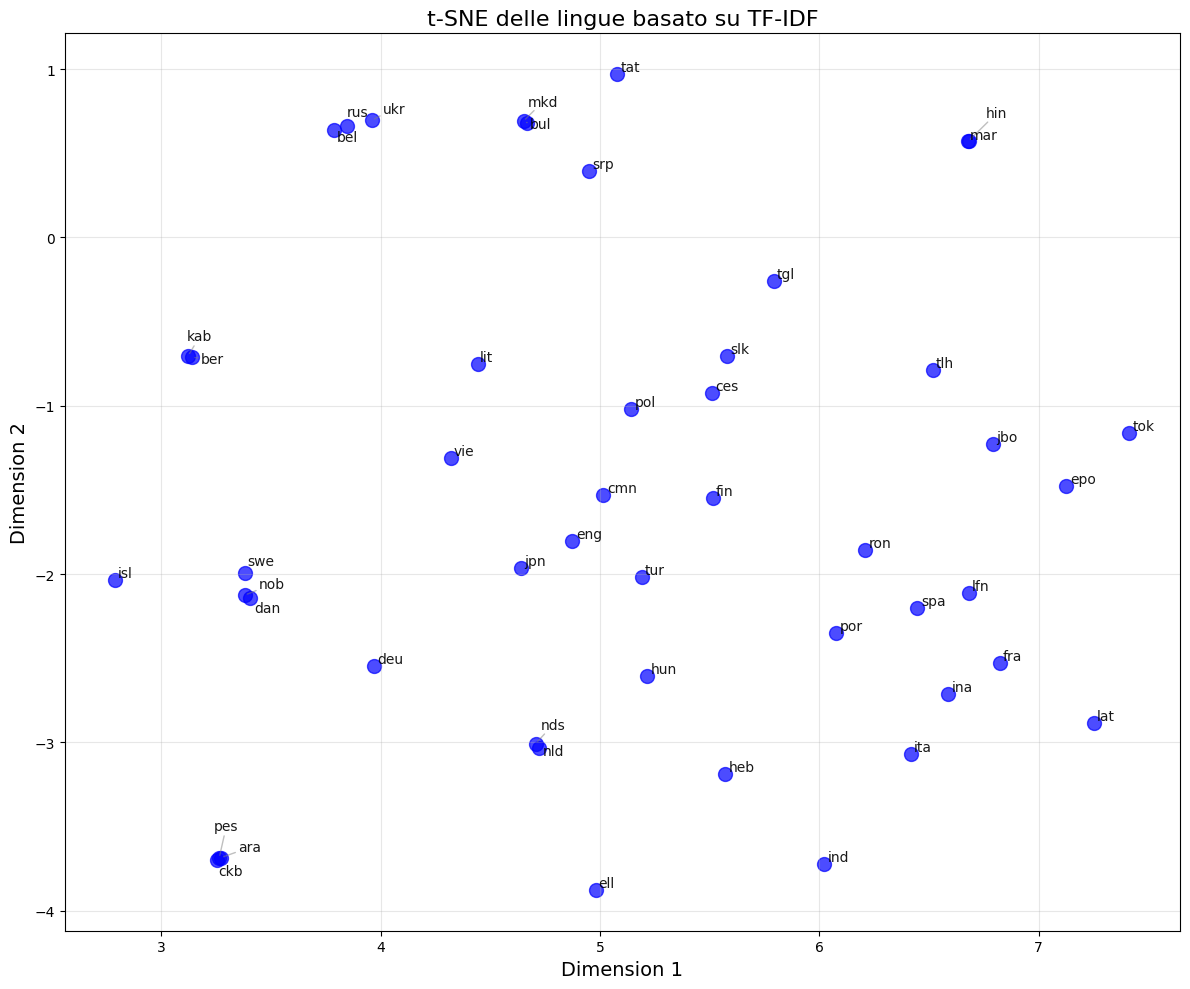

In [9]:
# Applicare t-SNE alla matrice TF-IDF
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_df)

# Creare un DataFrame per i risultati
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['lan_code'] = tfidf_df.index

# Creare il grafico scatter
plt.figure(figsize=(12, 10))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], s=100, c='blue', alpha=0.7)

# Aggiungere etichette per ogni punto
texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

# Usare adjustText per evitare sovrapposizioni
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

# Aggiungere titoli e assi
plt.title("t-SNE delle lingue basato su TF-IDF", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrare il grafico
plt.show()


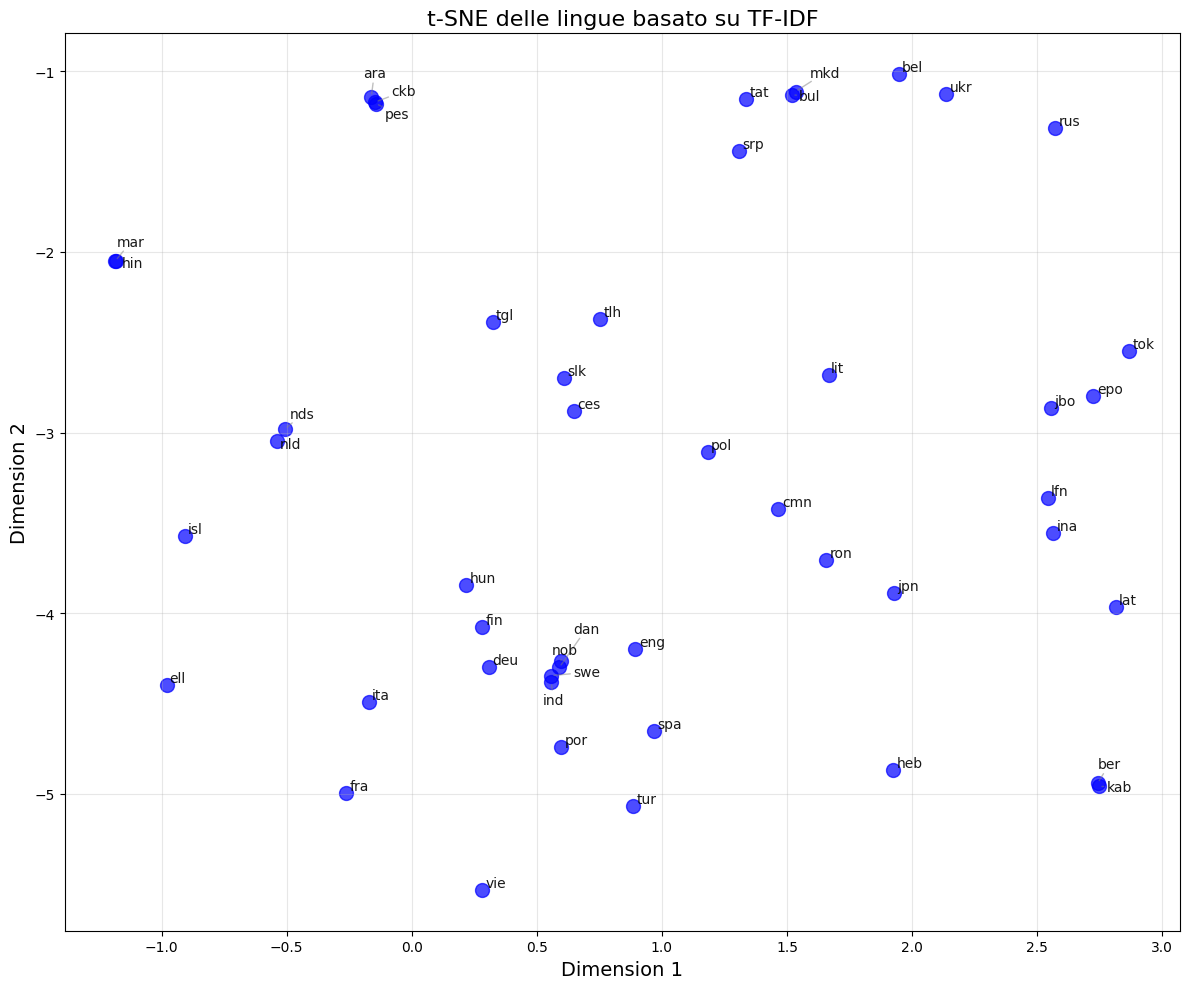

In [10]:
# Applicare t-SNE alla matrice TF-IDF
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(filtered_tfidf_df)

# Creare un DataFrame per i risultati
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['lan_code'] = filtered_tfidf_df.index

# Creare il grafico scatter
plt.figure(figsize=(12, 10))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], s=100, c='blue', alpha=0.7)

# Aggiungere etichette per ogni punto
texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

# Usare adjustText per evitare sovrapposizioni
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

# Aggiungere titoli e assi
plt.title("t-SNE delle lingue basato su TF-IDF", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrare il grafico
plt.show()


Best Silhouette Score with k=37: 0.0826


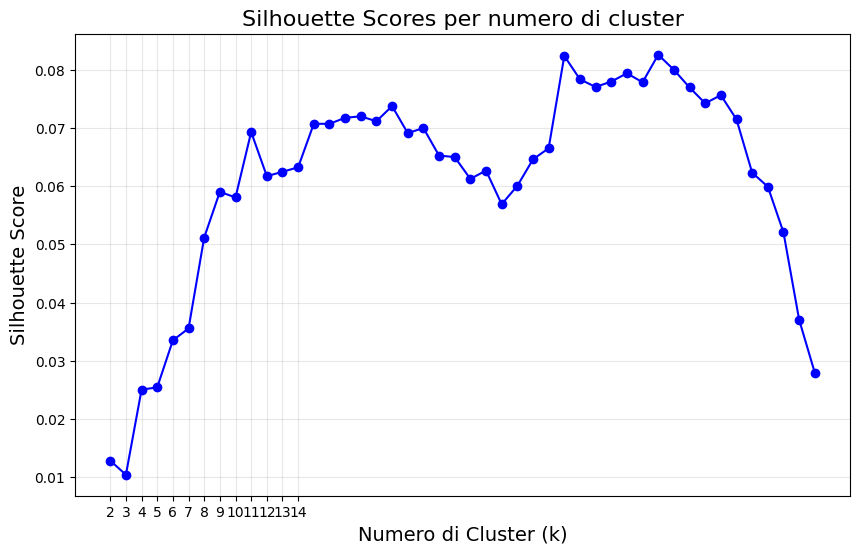

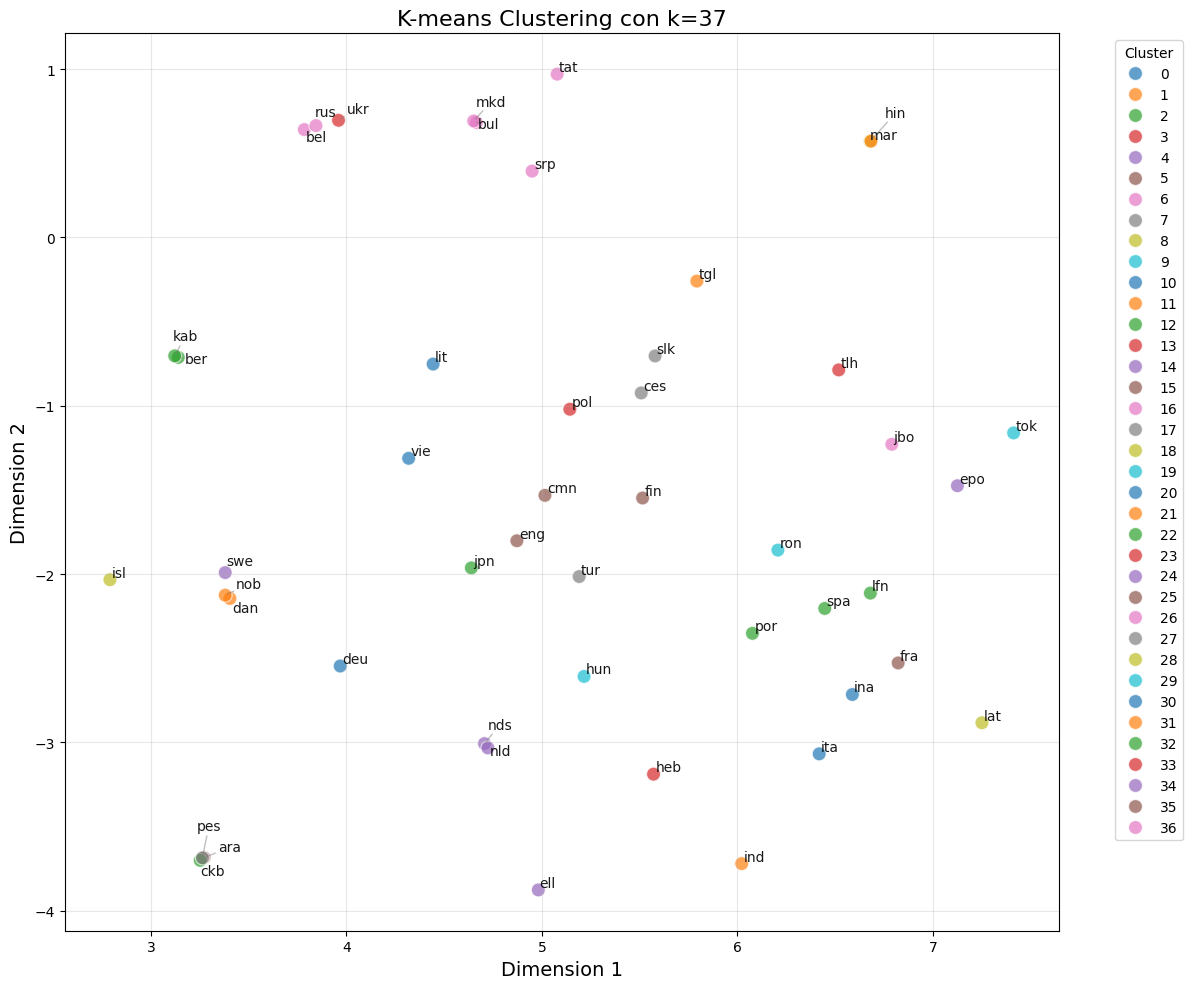

In [11]:
# Variabili per tracciare i migliori risultati
best_k = 0
best_sil_score = 0
silhouette_scores = []

# Cercare il miglior numero di cluster
for k in range(2, 48):
    # Calcolare K-means++
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(tfidf_df)

    # Calcolare il punteggio di silhouette per valutare il clustering
    sil_score = silhouette_score(tfidf_df, clusters)
    silhouette_scores.append((k, sil_score))
    
    # Trovare il miglior punteggio
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_k = k

# Mostrare il miglior valore di k e il relativo Silhouette Score
print(f"Best Silhouette Score with k={best_k}: {best_sil_score:.4f}")

# Grafico dei Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in silhouette_scores], [x[1] for x in silhouette_scores], marker='o', linestyle='-', color='b')
plt.xticks(range(2, 15))
plt.title("Silhouette Scores per numero di cluster", fontsize=16)
plt.xlabel("Numero di Cluster (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Clustering con il miglior numero di cluster
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(tfidf_df)

# Aggiungere i risultati del clustering al DataFrame
tfidf_df['Cluster'] = clusters

# Applicare t-SNE per ridurre la dimensionalità per la visualizzazione
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_df.drop('Cluster', axis=1))  # Escludi la colonna 'Cluster' per t-SNE

# Creare un DataFrame per i risultati
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters
tsne_df['lan_code'] = tfidf_df.index

# Visualizzare i risultati con Seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=tsne_df,
    x='Dimension 1', y='Dimension 2',
    hue='Cluster', palette='tab10', s=100, alpha=0.7
)

# Aggiungere etichette per ogni punto
texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

# Usare adjustText per evitare sovrapposizioni
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

# Titoli e dettagli
plt.title(f"K-means Clustering con k={best_k}", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrare il grafico
plt.show()


Best Silhouette Score with k=21: 0.1288


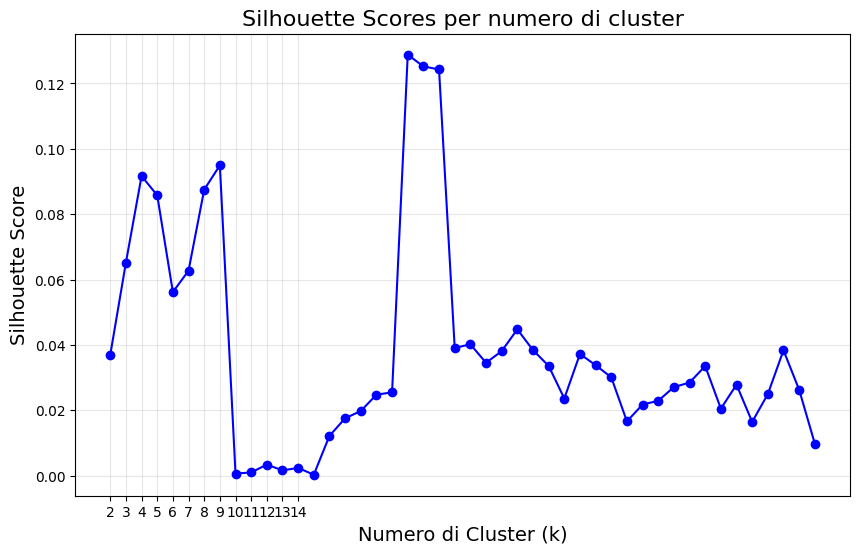

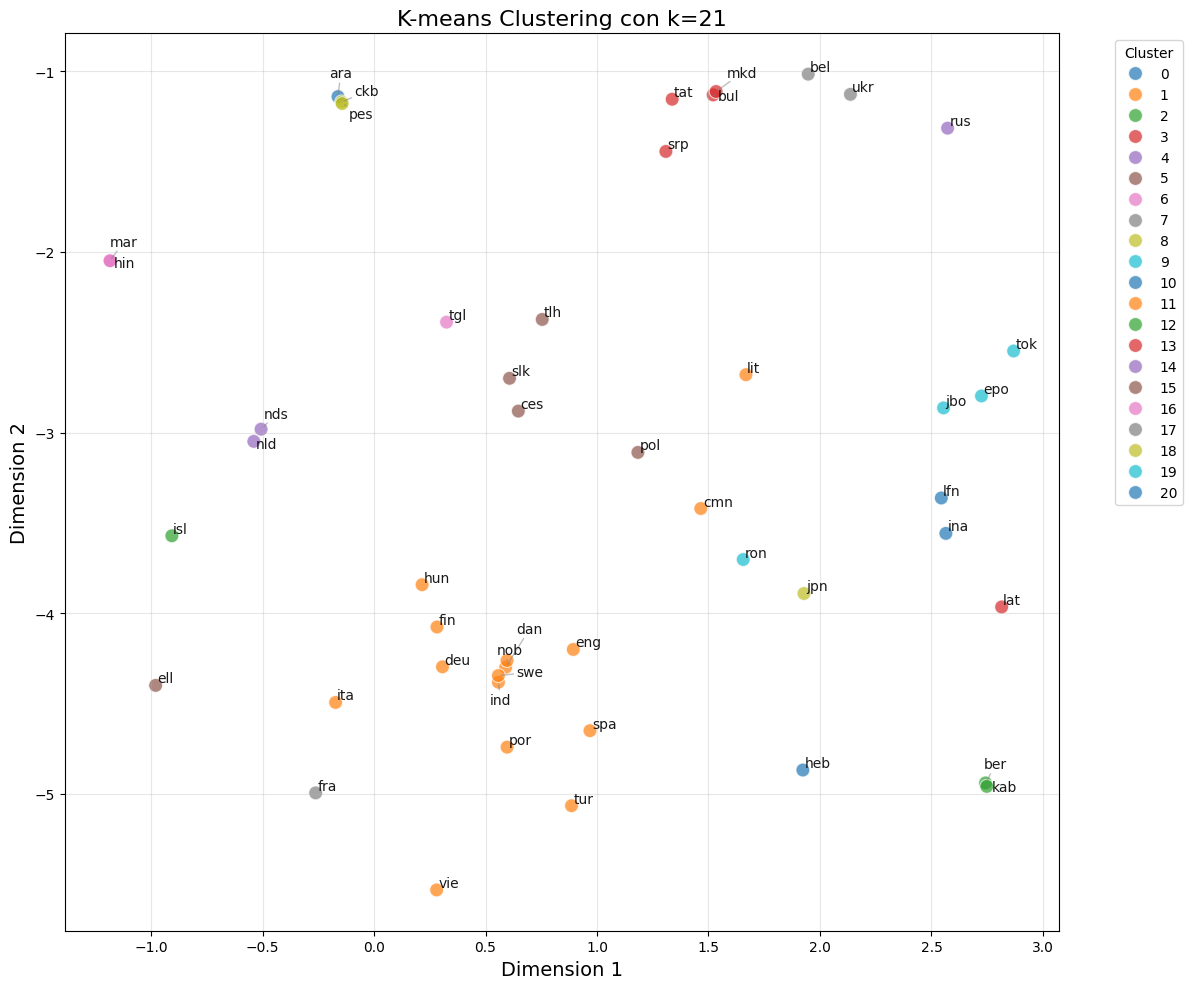

In [12]:
# Variabili per tracciare i migliori risultati
best_k = 0
best_sil_score = 0
silhouette_scores = []

# Cercare il miglior numero di cluster
for k in range(2, 48):
    # Calcolare K-means++
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(filtered_tfidf_df)

    # Calcolare il punteggio di silhouette per valutare il clustering
    sil_score = silhouette_score(filtered_tfidf_df, clusters)
    silhouette_scores.append((k, sil_score))
    
    # Trovare il miglior punteggio
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_k = k

# Mostrare il miglior valore di k e il relativo Silhouette Score
print(f"Best Silhouette Score with k={best_k}: {best_sil_score:.4f}")

# Grafico dei Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in silhouette_scores], [x[1] for x in silhouette_scores], marker='o', linestyle='-', color='b')
plt.xticks(range(2, 15))
plt.title("Silhouette Scores per numero di cluster", fontsize=16)
plt.xlabel("Numero di Cluster (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Clustering con il miglior numero di cluster
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(filtered_tfidf_df)

# Aggiungere i risultati del clustering al DataFrame
filtered_tfidf_df['Cluster'] = clusters

# Applicare t-SNE per ridurre la dimensionalità per la visualizzazione
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(filtered_tfidf_df.drop('Cluster', axis=1))  # Escludi la colonna 'Cluster' per t-SNE

# Creare un DataFrame per i risultati
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters
tsne_df['lan_code'] = filtered_tfidf_df.index

# Visualizzare i risultati con Seaborn
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=tsne_df,
    x='Dimension 1', y='Dimension 2',
    hue='Cluster', palette='tab10', s=100, alpha=0.7
)

# Aggiungere etichette per ogni punto
texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

# Usare adjustText per evitare sovrapposizioni
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

# Titoli e dettagli
plt.title(f"K-means Clustering con k={best_k}", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrare il grafico
plt.show()


## Language Classification with LSH

In [13]:
# Funzione per leggere il file CSV e restituire una lista di tuple (lan_code, sentence)
def read_csv(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        for row in reader:
            lan_code, sentence = row
            data.append((lan_code, sentence))
    return data

# Funzione per creare un MinHash per una frase
def create_minhash(sentence, num_perm=128):
    m = MinHash(num_perm=num_perm)
    for word in sentence.split():  # Consideriamo le parole come "shingle" per il MinHash
        m.update(word.encode('utf8'))
    return m

# Funzione per salvare i MinHash in un file
def save_minhashes(file_path, data, num_perm=128):
    minhashes = {}
    for i, (lan_code, sentence) in enumerate(data):
        minhashes[i] = (lan_code, sentence, create_minhash(sentence, num_perm))
    with open(file_path, 'wb') as f:
        pickle.dump(minhashes, f)

# Funzione per caricare i MinHash da un file
def load_minhashes(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

In [14]:

# Funzione principale per costruire l'LSH e cercare la frase più simile
def find_similar_sentence(csv_file_path, query_sentence, minhash_file_path, num_perm=128, threshold=0.5):
    # Controlla se esistono MinHash salvati
    if os.path.exists(minhash_file_path):
        print(f"Caricamento MinHash da '{minhash_file_path}'...")
        try:
            minhashes = load_minhashes(minhash_file_path)
            print("MinHash caricati con successo.")
        except Exception as e:
            print(f"Errore durante il caricamento dei MinHash: {e}")
            return
    else:
        print(f"File MinHash non trovato. Generazione dei MinHash...")
        try:
            data = read_csv(csv_file_path)
            save_minhashes(minhash_file_path, data, num_perm)
            minhashes = load_minhashes(minhash_file_path)
            print(f"MinHash generati e salvati in '{minhash_file_path}'.")
        except Exception as e:
            print(f"Errore durante la generazione dei MinHash: {e}")
            return

    # Resto della logica per trovare frasi simili...
    lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)

    id_to_data = {}
    for i, (lan_code, sentence, m) in minhashes.values():
        lsh.insert(str(i), m)
        id_to_data[str(i)] = (lan_code, sentence)

    query_minhash = create_minhash(query_sentence, num_perm)
    similar_ids = lsh.query(query_minhash)

    if similar_ids:
        max_similarity = 0
        best_match = None
        for idx in similar_ids:
            lan_code, sentence = id_to_data[idx]
            sentence_minhash = create_minhash(sentence, num_perm)
            similarity = query_minhash.jaccard(sentence_minhash)

            if similarity > max_similarity:
                max_similarity = similarity
                best_match = (lan_code, sentence)

        if best_match:
            print(f"Frase più simile: '{best_match[1]}'")
            print(f"Lingua: {best_match[0]}")
            print(f"Somiglianza: {max_similarity:.2f}")
    else:
        print("Nessuna frase simile trovata.")



In [ ]:
# Esempio di utilizzo
if __name__ == "__main__":
    # Path al file CSV
    csv_file_path = "data/filtered_language_detection.csv"  # Sostituisci con il percorso del tuo file

    # Path al file per salvare i MinHash
    minhash_file_path = "models/minhashes.pkl"  # File in cui salvare i MinHash

    # Frase di input
    input_sentence = "Inserisci qui la frase da confrontare"

    # Trova la frase più simile
    find_similar_sentence(csv_file_path, input_sentence, minhash_file_path)


File MinHash non trovato. Generazione dei MinHash...


# Language classification

In [3]:
# Caricare il dataset
file_path = 'data/filtered_language_detection.csv'  # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

In [4]:
# Divisione in caratteristiche (X) e target (y)
X = data['sentence']
y = data['lan_code']

# Generare la matrice TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Puoi aumentare max_features
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("Vectorizer ready")

# Divisione del dataset in training e test set (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Allenare un modello di classificazione (Logistic Regression)
classifier = LogisticRegression(random_state=42, max_iter=1000)  # Aumenta max_iter se necessario
classifier.fit(X_train, y_train)

# Fare previsioni sui dati di test
y_pred = classifier.predict(X_test)

# Valutazione del modello
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

# Salvare il modello in un file
joblib.dump(classifier, 'models/logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl' in models folder")

# Salvare anche il vettorizzatore TF-IDF
joblib.dump(tfidf_vectorizer, 'models/tfidf_vectorizer.pkl')
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl' in models folder")


Vectorizer ready
Classification Report:


C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

              precision    recall  f1-score   support

         ara       0.96      0.64      0.77      7599
         bel       0.74      0.12      0.21      2500
         ber       0.83      0.79      0.81    118909
         bul       0.83      0.38      0.52      4922
         ces       0.69      0.56      0.62     12793
         ckb       0.98      0.28      0.44      2135
         cmn       0.00      0.00      0.00     14394
         dan       0.77      0.83      0.80     11160
         deu       0.99      0.99      0.99    116759
         ell       1.00      0.77      0.87      6935
         eng       0.99      0.99      0.99    317329
         epo       0.97      0.98      0.97    137848
         fin       0.93      0.71      0.80     27805
         fra       0.98      0.96      0.97    100167
         heb       1.00      0.85      0.92     39875
         hin       0.93      0.29      0.45      2865
         hun       0.98      0.77      0.86     71898
         ina       0.91    

In [13]:
# Stampare le features utilizzate dal modello
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_importances = np.abs(classifier.coef_).mean(axis=0)

# Ordina le features per importanza
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

print("\nTop 5000 features:")
for i in range(5000):
    print(f"{sorted_features[i]}: {sorted_importances[i]:.4f}")


Top 5000 features:
de: 4.2511
tom: 3.9888
la: 3.9316
mi: 3.7072
en: 3.4537
un: 3.1142
me: 2.9172
to: 2.8809
se: 2.8349
in: 2.8301
je: 2.8142
du: 2.7597
не: 2.6969
tu: 2.6682
is: 2.6627
ad: 2.5951
que: 2.5155
том: 2.4504
es: 2.4220
ne: 2.3508
le: 2.3183
ɣer: 2.2998
do: 2.2715
da: 2.2708
er: 2.2502
si: 2.2186
vi: 2.2081
na: 2.2001
te: 2.1965
ma: 2.1110
on: 2.0836
lo: 2.0627
ha: 2.0437
ta: 2.0215
mary: 1.9982
di: 1.9876
il: 1.9800
li: 1.9468
sami: 1.8660
ur: 1.8531
el: 1.8471
sa: 1.8468
ni: 1.8370
the: 1.8001
no: 1.7884
non: 1.7539
al: 1.7418
sin: 1.7405
ara: 1.7350
as: 1.7305
на: 1.7277
den: 1.7218
per: 1.7085
ik: 1.7051
su: 1.6744
that: 1.6496
an: 1.6416
да: 1.6191
et: 1.6172
va: 1.6124
ti: 1.5957
kan: 1.5754
deg: 1.5619
you: 1.5572
at: 1.5531
nu: 1.5517
po: 1.5433
he: 1.5370
man: 1.5307
ja: 1.5300
was: 1.5178
am: 1.5171
bir: 1.5162
var: 1.5116
est: 1.5048
estas: 1.4908
ich: 1.4783
maria: 1.4683
nos: 1.4209
ten: 1.4207
tam: 1.4159
con: 1.4157
min: 1.4037
nni: 1.3887
за: 1.3677
son: 1.3

In [11]:
# Calcola la confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

# Assicurati che x e y corrispondano alle dimensioni della matrice conf_matrix
z = conf_matrix
x = list(classifier.classes_)  # Etichette delle colonne (lista)
y = list(classifier.classes_)  # Etichette delle righe (lista)

# Crea la heatmap con Plotly
fig = ff.create_annotated_heatmap(
    z, x=x, y=y, colorscale='Blues', showscale=True,
    annotation_text=z.astype(str).tolist(), font_colors=['black']  # annotation_text come lista
)

fig.update_layout(
    title_text='Confusion Matrix (All Classes)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickangle=45),
    autosize=True,
    height=1600,  # Altezza per gestire molte classi
    width=1600    # Larghezza per una buona leggibilità
)

fig.show()



# Word2Vec

In [2]:

nltk.download('punkt')

# Caricare il dataset
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

# Funzione per pulire e preprocessare il testo
def preprocess_text(text):
    # Rimuovi caratteri speciali, numeri e trasformazione in minuscolo
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    # Tokenizzazione
    tokens = word_tokenize(text)
    return tokens

# Applicare la pre-elaborazione
data['tokens'] = data['sentence'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\valer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
corpus = data['tokens'].tolist()

# Addestrare Word2Vec
model = Word2Vec(
    sentences=corpus,  # Il corpus tokenizzato
    vector_size=500,   # Dimensione degli embedding
    window=10,          # Dimensione del contesto
    min_count=5,       # Ignora parole che appaiono meno di 2 volte
    workers=4          # Numero di thread
)

# Salvare il modello per utilizzi futuri
model.save("multilingual_word2vec.model")

print("Modello Word2Vec addestrato e salvato.")

Modello Word2Vec addestrato e salvato.


In [15]:
model = Word2Vec.load("multilingual_word2vec.model")

In [ ]:
similar_words = model.wv.most_similar('cat', topn=10)
print("Parole correlate a 'cat':", similar_words)

Parole correlate a 'cat': [('dog', 0.8875775337219238), ('boy', 0.8844391107559204), ('bird', 0.8587238788604736), ('horse', 0.8576750159263611), ('rabbit', 0.8512253761291504), ('squirrel', 0.8407779335975647), ('snake', 0.8374595642089844), ('puppy', 0.8349277377128601), ('child', 0.8340840339660645), ('flower', 0.8293748497962952)]


In [46]:
analogy = model.wv.most_similar(positive=['game', 'football'], negative=['loose'], topn=3)
print("Risultato dell'analogia: king - man + woman =", analogy)

Risultato dell'analogia: king - man + woman = [('club', 0.6965464353561401), ('basketball', 0.6802994608879089), ('baseball', 0.671710193157196)]


In [60]:
# Ottenere i vettori di parole per le parole più frequenti
words = list(model.wv.index_to_key)[:1000]  # Considera le 1000 parole più comuni
word_vectors = model.wv[words]

# Ridurre dimensionalità con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
reduced_vectors = tsne.fit_transform(word_vectors)

# Creare un DataFrame per il grafico
tsne_df = pd.DataFrame(reduced_vectors, columns=['x', 'y'])
tsne_df['word'] = words

# Creare il grafico interattivo con Plotly
fig = px.scatter(tsne_df, x='x', y='y', text='word', title='Proiezione t-SNE dello spazio vettoriale')

# Personalizzare il layout per mostrare le etichette al passaggio del mouse
fig.update_traces(textposition='top center', marker=dict(size=8, opacity=0.8))
fig.update_layout(hovermode='closest', title_font_size=20)

# Mostrare il grafico
fig.show()

C:\Users\valer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [66]:
# Scegliere un sottoinsieme di parole
words_subset = ['cat', 'dog', 'gatto', 'cane', 'chat', 'chien']  # Scegli parole di lingue diverse
similarity_threshold = 0.5  # Imposta una soglia di similarità

# Creare un grafo
G = nx.Graph()
for word in words_subset:
    for similar_word, similarity in model.wv.most_similar(word, topn=10):
        if similarity > similarity_threshold:
            G.add_edge(word, similar_word, weight=similarity)

# Convertire il grafo in un formato compatibile con Pyvis
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")
net.from_nx(G)

# Aggiungere tooltip per i nodi
for node in net.nodes:
    node['title'] = node['id']  # Mostra il nome della parola quando passi il mouse

# Configurare l'aspetto della rete
net.repulsion(
    node_distance=150,
    central_gravity=0.33,
    spring_length=100,
    spring_strength=0.10,
    damping=0.95,
)

# Salva e visualizza la rete
net.write_html("semantic_network.html")
webbrowser.open("semantic_network.html")

True

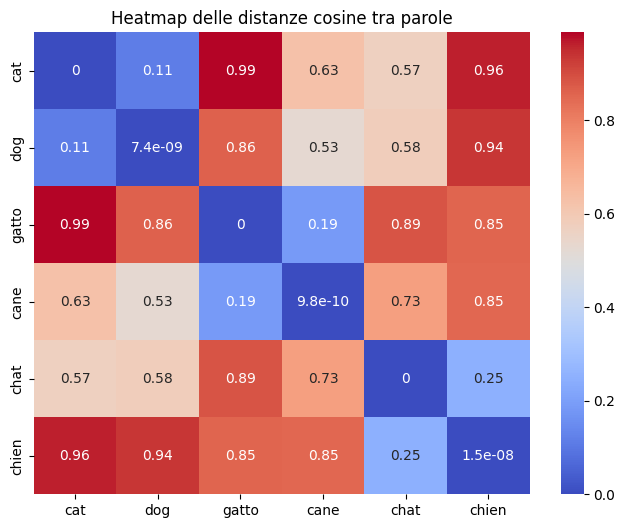

In [67]:
# Definire un elenco di parole di lingue diverse
words = ['cat', 'dog', 'gatto', 'cane', 'chat', 'chien']
matrix = []

# Calcolare le distanze cosine tra tutte le parole
for word1 in words:
    row = []
    for word2 in words:
        dist = cosine(model.wv[word1], model.wv[word2])
        row.append(dist)
    matrix.append(row)

# Convertire in array numpy e creare una heatmap
matrix = np.array(matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, xticklabels=words, yticklabels=words, annot=True, cmap='coolwarm', cbar=True)
plt.title("Heatmap delle distanze cosine tra parole")
plt.show()

Risultato dell'analogia: king - man + woman = [('queen', 0.7993223667144775)]


C:\Users\valer\AppData\Local\Temp\ipykernel_26320\3622232979.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




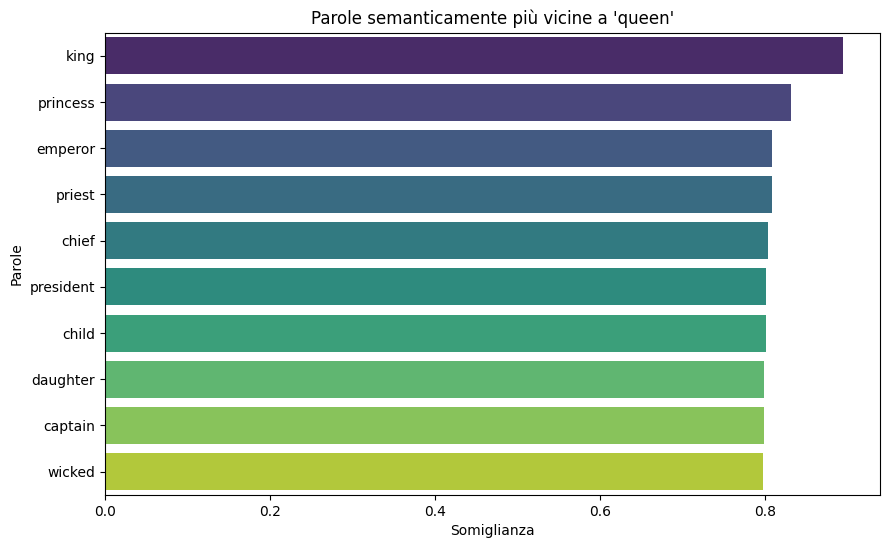

In [68]:
# Esempio di analogia
analogy = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("Risultato dell'analogia: king - man + woman =", analogy)

# Visualizzazione (opzionale)
word = analogy[0][0]
similar_words = model.wv.most_similar(word, topn=10)

# Creare un barplot per visualizzare il risultato
similar_df = pd.DataFrame(similar_words, columns=['Word', 'Similarity'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity', y='Word', data=similar_df, palette='viridis')
plt.title(f"Parole semanticamente più vicine a '{word}'")
plt.xlabel("Somiglianza")
plt.ylabel("Parole")
plt.show()


# Language Classification with word2vec

In [74]:
from sklearn.preprocessing import LabelEncoder

# Preparare il dataset con le parole e le lingue
# Supponiamo che `filtered_language_detection.csv` sia il dataset con colonne: 'lan_code' (lingua) e 'sentence'
file_path = "data/filtered_language_detection.csv"
data = pd.read_csv(file_path)

# Tokenizza le frasi e prepara una lista di parole con le rispettive lingue
word_lang_pairs = []
for _, row in data.iterrows():
    words = row['sentence'].lower().split()  # Semplice tokenizzazione
    for word in words:
        if word in model.wv:  # Considera solo le parole che esistono nel vocabolario Word2Vec
            word_lang_pairs.append((word, row['lan_code']))

# Converti in un DataFrame
word_lang_df = pd.DataFrame(word_lang_pairs, columns=['word', 'language'])

# Creare i vettori usando Word2Vec
X = np.array([model.wv[word] for word in word_lang_df['word']])  # Vettori Word2Vec
y = word_lang_df['language']  # Etichette delle lingue

# Codificare le etichette delle lingue in numeri
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [75]:


# Suddividere i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Allenare il modello di Logistic Regression
lr_model = LogisticRegression(max_iter=100, random_state=42, multi_class='multinomial', solver='lbfgs')
lr_model.fit(X_train, y_train)

# Valutare il modello
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


MemoryError: Unable to allocate 28.1 GiB for an array with shape (37767306, 100) and data type float64

In [ ]:

# Testare il modello con una parola specifica
def predict_language(word):
    if word in model.wv:
        vector = model.wv[word].reshape(1, -1)  # Ridimensiona il vettore
        prediction = lr_model.predict(vector)
        predicted_language = label_encoder.inverse_transform(prediction)[0]
        return predicted_language
    else:
        return "Parola non presente nel vocabolario di Word2Vec"

# Esempio
test_word = "gatto"
predicted_lang = predict_language(test_word)
print(f"La parola '{test_word}' è stata predetta come lingua: {predicted_lang}")
